<a href="https://colab.research.google.com/github/FY6599/SBE3136-Lab-Project-2403421/blob/main/SBE3136_Lab5_2403421.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn
import tensorflow as tf

In [22]:
print("scikit-learn version:", sklearn.__version__)
print("Tensorflow version:", tf.__version__)


scikit-learn version: 1.6.1
Tensorflow version: 2.19.0


In [24]:
file_loc = 'https://storage.googleapis.com/low-code-ai-book/churn_dataset.csv'
df_raw = pd.read_csv(file_loc)
df_raw.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
mask = (df_raw['TotalCharges'] == ' ')
df_raw[mask].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [34]:
df_1 = df_raw.replace({'TotalCharges': {'': 0.0}})
mask = (df_raw['tenure']==0)
df_1[mask][['tenure','TotalCharges']]

,tenure,TotalCharges
488,0,
753,0,
936,0,
1082,0,
1340,0,
3331,0,
3826,0,
4380,0,
5218,0,
6670,0,


In [36]:
df_1['TotalCharges'] = df_1['TotalCharges'].replace(' ', 0.0)
df_2 = df_1.astype({'TotalCharges':'float64'})
df_2.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [37]:
df_2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [38]:
df_2.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [40]:
df_2.value_counts(['PhoneService','MultipleLines'])


PhoneService  MultipleLines   
Yes           No                  3390
              Yes                 2971
No            No phone service     682
Name: count, dtype: int64

<Axes: xlabel='Contract'>

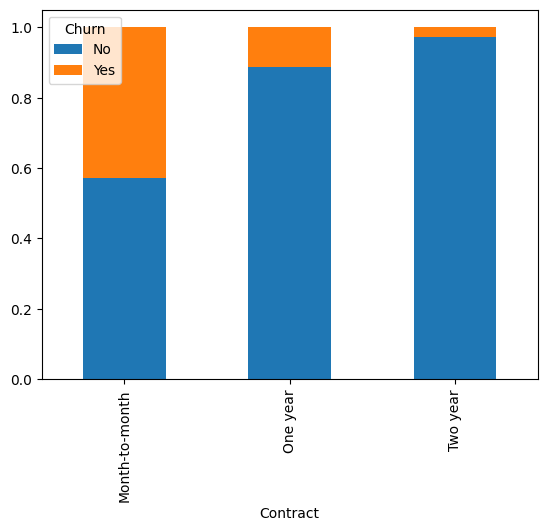

In [41]:
(df_2.groupby('Contract')['Churn'].value_counts(normalize=True)
.unstack('Churn')
.plot.bar(stacked=True))

In [42]:
df_2['AvgMonthlyCharge'] = (df_2['TotalCharges'].div(df_2['tenure'])
.replace(np.nan,0))
df_2['DiffCharges'] = df_2['MonthlyCharges']-df_2['AvgMonthlyCharge']
df_2['DiffCharges'].describe()

,DiffCharges
count,7043.000000
mean,0.063475
std,3.211815
min,-18.900000
25%,-1.159091
50%,0.000000
75%,1.154880
max,80.850000


<Axes: xlabel='DiffBuckets'>

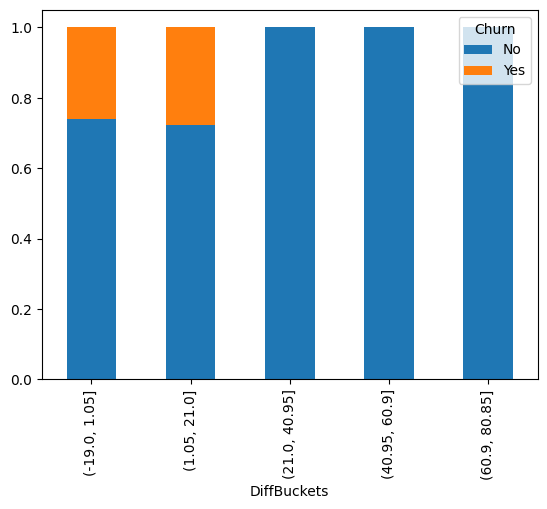

In [57]:
df_2['DiffBuckets'] = pd.cut(df_2['DiffCharges'], bins=5)
(df_2.groupby('DiffBuckets', observed=False)['Churn'].value_counts(normalize=True).unstack('Churn').plot.bar(stacked=True))

In [58]:
df_3 = df_2.drop(columns=['customerID'])
df_3.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [53]:
df_3 = df_2.copy()
df_3 = df_3.drop(columns=['gender','StreamingTV',
                          'StreamingMovies','PhoneService'])
df_3.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'AvgMonthlyCharge', 'DiffCharges', 'DiffBuckets'],
      dtype='object')

In [61]:
df_3 = df_3.drop(columns=['TotalCharges','AvgMonthlyCharge',
                          'DiffCharges'])

KeyError: "['TotalCharges', 'AvgMonthlyCharge'] not found in axis"

In [62]:
df_3 = df_2.drop(columns=['DiffCharges'])
print(df_3.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'AvgMonthlyCharge', 'DiffBuckets'],
      dtype='object')


In [64]:
df_prep = df_3.replace('No internet service','No')
df_prep[['OnlineSecurity','OnlineBackup',
'DeviceProtection','TechSupport']].nunique()

,0
OnlineSecurity,2
OnlineBackup,2
DeviceProtection,2
TechSupport,2


In [67]:
from sklearn.preprocessing import OneHotEncoder

numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
categorical_columns = ['Partner', 'Dependents', 'MultipleLines',
                       'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'Contract', 'PaperlessBilling',
                       'PaymentMethod', 'DiffBuckets']

X_num = df_prep[numeric_columns]
X_cat = df_prep[categorical_columns]

ohe = OneHotEncoder (drop='if_binary')
X_cat_trans = ohe.fit_transform(X_cat)

In [68]:
X_cat_trans.toarray()[0]
ohe.inverse_transform(X_cat_trans.toarray())[0]

array(['Yes', 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No',
       'Month-to-month', 'Yes', 'Electronic check',
       Interval(-19.0, 1.05, closed='right')], dtype=object)

In [69]:
X = np.concatenate ((X_num.values, X_cat_trans.toarray()), axis=1)
y = df_prep['Churn'].values

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
                                                    random_state=113)

X_train.shape

(5634, 28)

In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

cls = LogisticRegression()

cls.fit(X_train_scaled, y_train)

LogisticRegression()

In [77]:
X_test_scaled = scaler.transform(X_test)

cls.score(X_test_scaled, y_test)

0.8005677785663591

In [78]:
from sklearn.metrics import confusion_matrix

y_pred = cls.predict(X_test_scaled)

confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])

array([[185, 187],
       [ 94, 943]])

In [79]:
from sklearn.metrics import precision_score, recall_score

print("Precision: ", precision_score (y_test, y_pred, labels=['Yes', 'No' ],
pos_label='Yes'))

print("Recall:", recall_score (y_test, y_pred, labels = ['Yes', 'No'],
pos_label='Yes'))

Precision:  0.6630824372759857
Recall: 0.49731182795698925
